<a href="https://colab.research.google.com/github/VenkateshRoshan/Eck-Projects/blob/main/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.
X_test =X_test / 255.
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


### using MLP classifier

In [3]:
MLP_clf = MLPClassifier(random_state=1, max_iter=10).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [4]:
MLP_clf.predict(X_test[1].reshape(1,-1))

array([2], dtype=uint8)

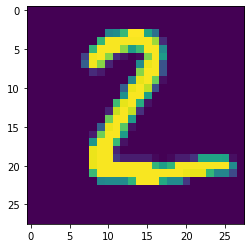

In [5]:
plt.imshow(X_test[1].reshape(28,28))
plt.show()

In [6]:
c = 0
for i in range(len(X_test)) :
    if y_test[i] == MLP_clf.predict(X_test[i].reshape(1,-1))[0] :
        c += 1
print(c*100/len(y_test))
mlp_ = (c*100)/len(y_test)

97.51


### using SVM classifier

In [7]:
svm_clf = svm.SVC().fit(X_train,y_train)

In [8]:
svm_clf.predict(X_test[10].reshape(1,-1))

array([0], dtype=uint8)

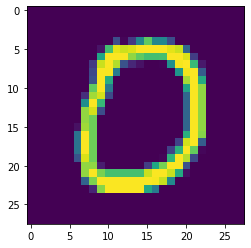

In [9]:
plt.imshow(X_test[10].reshape(28,28))
plt.show()

In [10]:
c = 0
for i in range(len(X_test)) :
    if y_test[i] == svm_clf.predict(X_test[i].reshape(1,-1))[0] :
        c += 1
print(c*100/len(y_test))
svm_ = (c*100)/len(y_test)

97.92


### using Perceptron

In [11]:
from sklearn.linear_model import Perceptron

In [12]:
clf = Perceptron(tol=1e-3, random_state=0)

In [13]:
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
clf.score(X_train, y_train)

0.8853833333333333

In [15]:
per_ = clf.score(X_test,y_test)

### Prediction Results

In [16]:
print(f'MLP Classifier - {mlp_}')
print(f'SVM Classifier - {svm_}')
print(f'Perceptron - {per_}')

MLP Classifier - 97.51
SVM Classifier - 97.92
Perceptron - 0.8805
